#### Chapter 3 - Linear Regression

Q: Is there a relationship between advertising budget and sales?

A: TV advertising shows a linear pattern with the amount of money spent on advertising and sales. However, the relationship begins to less linear above the 200 mark with more outliars. 

Radio does show somewhat of a linear pattern but has consistent outliars, meaning non linear model might be able to capture this behaviour better but for the most part most of the majority population show a linear pattern. 

Newspaper is slightly more stochastic indiciting that increased marketing doesn't generally lead to increased sales and could be a lot more difficult to model based on the distribution of data.

Q: How strong is the relationship between advertising budget and sales?

A: The relationship for TV and Radio is strong but the newspaper shows a weak relationship.

Q: Which media are associated with sales?

A: TV and Radio with sales from the newspaper being the worst performing.

Q: How large is the association between each medium and sales?

A: Radio shows a greater association with the majority of the population demonstrating a linear pattern with advertising. This is followed to some degree by TV but quickly rounds off and newspaper appears to be stochastic.

Q: How accurately can we predict the future sales?

A: Future sales for Radio and TV would likely provide better forecasts than for newspaper.

Q: Is the relationship linear?

A: Radio may suit a linear model well as well as TV. but TV may benefit from a more flexible model to capture to increased distribution as the expendature for advertising increases. Newspaper is not linear.

Q: Is there synergy among the advertising media

A: This is difficult to determine due to the X axis for each graph having different figures.

### Lab: Linear Regression

In [307]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [308]:
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm as ANOVA

In [309]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [310]:
dir()

['A',
 'ANOVA',
 'Boston',
 'Carsets',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 'Xma',
 '_',
 '_103',
 '_104',
 '_105',
 '_106',
 '_107',
 '_108',
 '_109',
 '_11',
 '_111',
 '_112',
 '_113',
 '_114',
 '_115',
 '_116',
 '_117',
 '_118',
 '_12',
 '_123',
 '_124',
 '_125',
 '_126',
 '_127',
 '_128',
 '_13',
 '_130',
 '_131',
 '_132',
 '_133',
 '_134',
 '_135',
 '_136',
 '_137',
 '_138',
 '_14',
 '_142',
 '_143',
 '_144',
 '_145',
 '_146',
 '_147',
 '_148',
 '_15',
 '_150',
 '_151',
 '_152',
 '_153',
 '_154',
 '_155',
 '_156',
 '_157',
 '_16',
 '_160',
 '_165',
 '_17',
 '_175',
 '_176',
 '_177',
 '_178',
 '_179',
 '_18',
 '_180',
 '_182',
 '_183',
 '_184',
 '_185',
 '_186',
 '_187',
 '_188',
 '_189',
 '_19',
 '_190',
 '_194',
 '_195',
 '_196',
 '_197',
 '_198',
 '_199',
 '_200',
 '_202',
 '_203',
 '_204',
 '_205',
 '_206',
 '_207',
 '_208',
 '_209',
 '_211',
 '_214',
 '_219',
 '_220',
 '_221',
 '_222',
 '_223',
 '_224',
 '_226',
 '_227',
 '_228',
 '_229',
 '_230',
 '_231',
 '_232',
 '_233',
 '

In [311]:
A = np.array([3, 5 ,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [312]:
A.sum()

19

### Simple Linear Regression

In [313]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [314]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [315]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [316]:
y = Boston['medv']
model = sm.OLS
results = model(y, X).fit()

In [317]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [318]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [319]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [320]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           5.08e-88
Time:                        14:19:55   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [322]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [323]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [324]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [325]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [326]:
def abline(ax, b, m):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.plot(xlim, ylim)

In [327]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_88301/1198889689.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_88301/1198889689.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


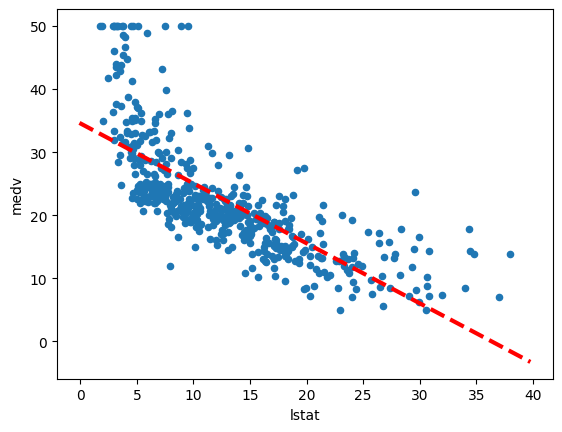

In [328]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

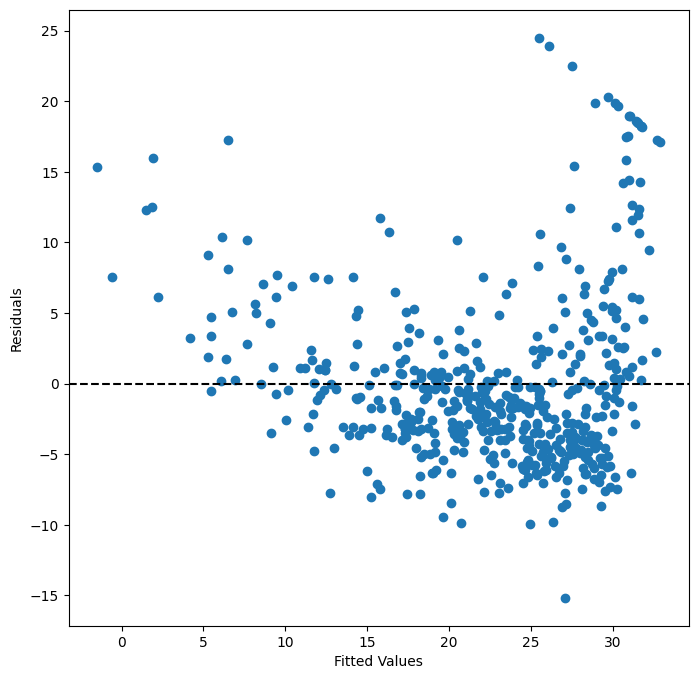

In [329]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')

374

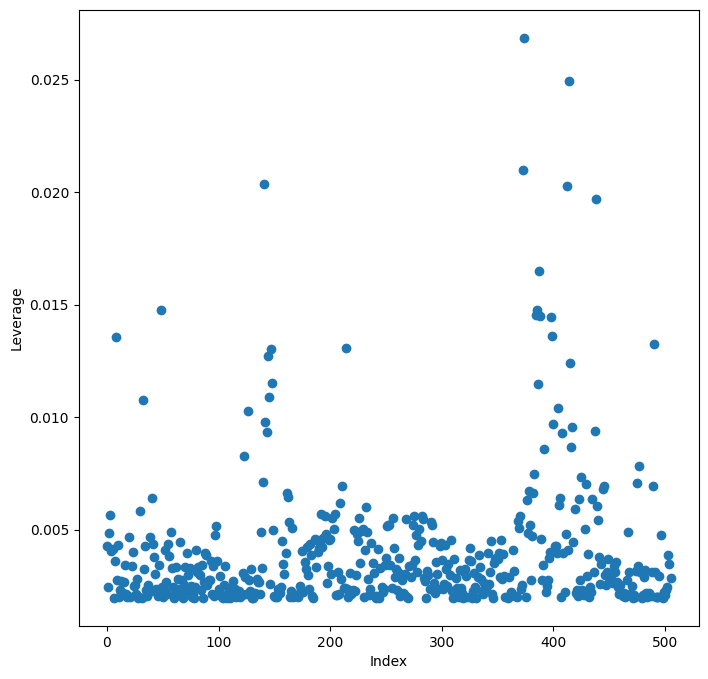

In [330]:
infl = results.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


### Multiple Linear Regression

In [331]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [332]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [333]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [334]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### Multivariate Goodness of Fit

In [335]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [336]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

### Interaction Terms

In [337]:
X = MS(['lstat',
       'age',
       ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-Linear Transformations of the Predictors

In [338]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [339]:
ANOVA(results, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11349.418808,0.0,NaN,NaN,NaN
1,502.0,14165.613251,-9.0,-2816.194443,11.0889,NaN


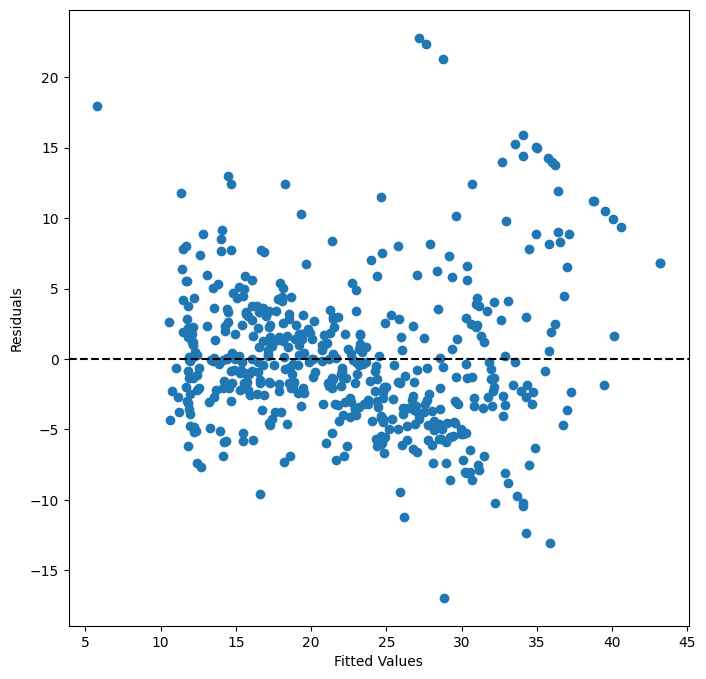

In [340]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')

### Qualitative Predictors

In [341]:
Carsets = load_data("Carseats")
Carsets.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [342]:
allvars = list(Carsets.columns.drop('Sales'))
y = Carsets['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carsets)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


### Exercises

1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model. 

* Based o the P-values. It shows that TV and radio are much more effective in predicting future sales compared to newspapers.

2. Carefully explain the differences between the KNN classifier and KNN regression methods. 

* A KNN classifier is focused around finding a categorical value. A good example of classification of spam and ham mail. For KNN regression, this is more focused on finding a specific value. For example, predicting the price of a house based on postcode, bedrooms, garage would be a regression model.

3. Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Level (1 for College and 0 for High School), X4 = Interac-tion between GPA and IQ, and X5 = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get:

X1 = GPA
x2 = IQ
X3 = Level
X4 = Interaction GPA-IQ
X5 = Interaction between GPA and Level

β0 = 50,
β1 = 20,
β2 = 0.07,
β3 = 35,
β4 = 0.01,
β5 =−10.

a) Which answer is correct, and why?

i. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates.

* False

ii. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates.

* True

iii. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates provided that the
GPA is high enough.

* True

iv. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates provided that
the GPA is high enough.

* False

(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

* 136,100

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

* The statement is false. The small size of the coefficient does not automatically imply that there is little evidence of an interaction effect. 

### Applied

In [343]:
auto = load_data("Auto")
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [344]:
X = MS(['horsepower']).fit_transform(auto)
model = sm.OLS(auto['mpg'], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           7.03e-81
Time:                        14:19:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

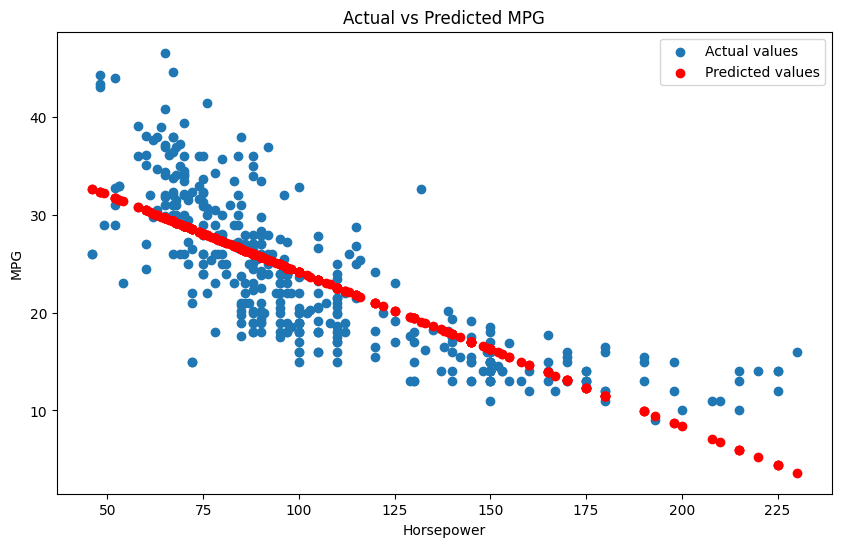

In [345]:
predicted_values = results.fittedvalues

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(auto['horsepower'], auto['mpg'], label='Actual values')
plt.scatter(auto['horsepower'], predicted_values, color='red', label='Predicted values')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Actual vs Predicted MPG')
plt.show()


i. There is a negative trend with the predictor and the response. As shown in the graph above, the higher horsepower a vehicle has, the lower MPG.

ii. The relationship is strong, there's a clear pattern in the data that demonstrates a negative trend. However, a better non-linear model could be used to capture  the relationshipo better.

iii. Negative.

iv. Around 24-28mpg

In [346]:
new_data = pd.DataFrame({'horsepower': [98]})

new_X = MS(['horsepower']).fit_transform(new_data)

prediction_results = results.get_prediction(new_X)

predicted_mpg = prediction_results.predicted_mean[0]

confidence_interval = prediction_results.conf_int(alpha=0.05)[0]

prediction_interval = prediction_results.conf_int(obs=True, alpha=0.05)[0]

predicted_mpg, confidence_interval, prediction_interval

(24.46707715251242,
 array([23.97307896, 24.96107534]),
 array([14.80939607, 34.12475823]))

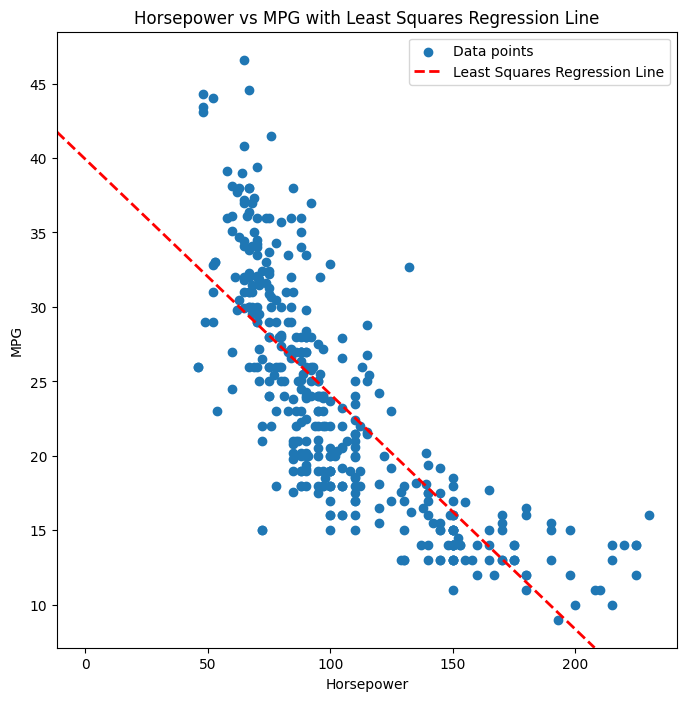

In [347]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(auto['horsepower'], auto['mpg'], label='Data points')

ax.axline(xy1=(0, results.params['intercept']), slope=results.params['horsepower'], color='red', linestyle='--', linewidth=2, label='Least Squares Regression Line')

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('Horsepower vs MPG with Least Squares Regression Line')
ax.legend()

plt.show()

9. This question involves the use of multiple linear regression on the
Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

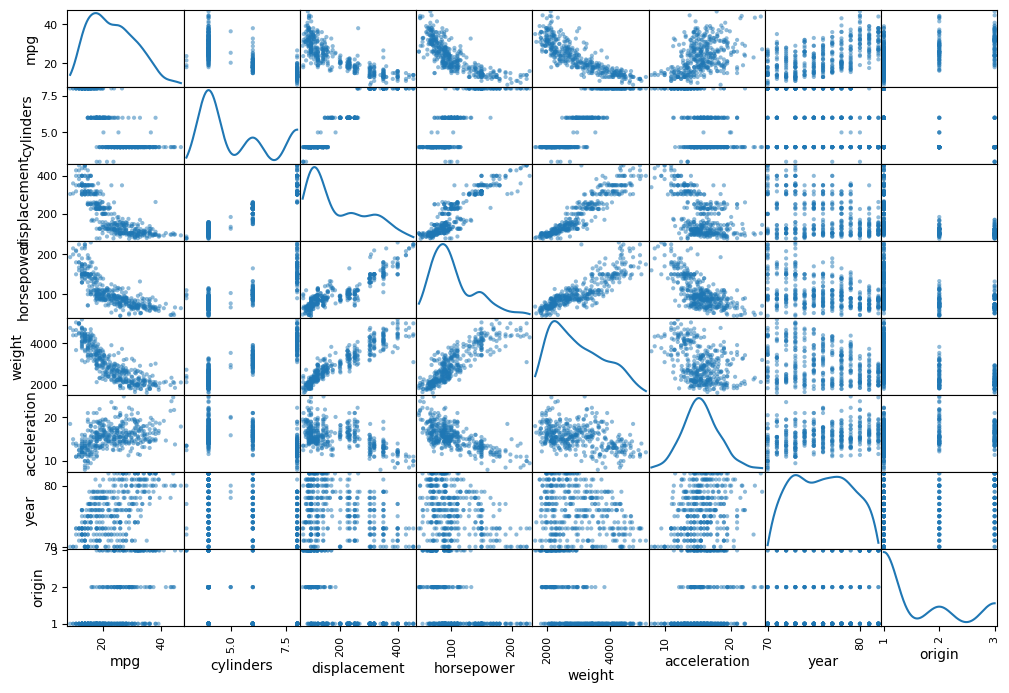

In [348]:
scatter_matrix(auto, figsize=(12, 8), diagonal='kde')
plt.show()

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [349]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [350]:
new_df = auto.reset_index()

features = new_df.columns.drop(['name'])

X = MS(features).fit_transform(new_df)
model = sm.OLS(new_df['mpg'], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.266e+27
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:19:58   Log-Likelihood:                 10112.
No. Observations:                 392   AIC:                        -2.021e+04
Df Residuals:                     383   BIC:                        -2.017e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -1.244e-12   2.18e-12     -0.571      0.568   -5.53e-12    3.04e-12
mpg              1.0000   2.35e-14   4.25e+13      0.000       1.000       1.000
cylinders     2.609e-15   1.49e-13      0.017      0.986   -2.91e-13    2.96e-13
displacement  5.829e-16   3.49e-15      0.167      0.868   -6.29e-15    7.45e-15
horsepower   -7.459e-16   6.37e-15     -0.117      0.907   -1.33e-14    1.18e-14
weight       -1.355e-16   3.37e-16     -0.402      0.688   -7.98e-16    5.27e-16
acceleration   2.22e-16   4.56e-14      0.005      0.996   -8.94e-14    8.99e-14
year          5.274e-16   2.94e-14      0.018      0.986   -5.72e-14    5.83e-14
origin       -4.441e-16   1.32e-13     -0.003      0.997   -2.61e-13     2.6e-13
==============================================================================
Omnibus:                       21.218   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.836
Skew:                           0.493   Prob(JB):                     4.93e-05
Kurtosis:                       2.506   Cond. No.                     8.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

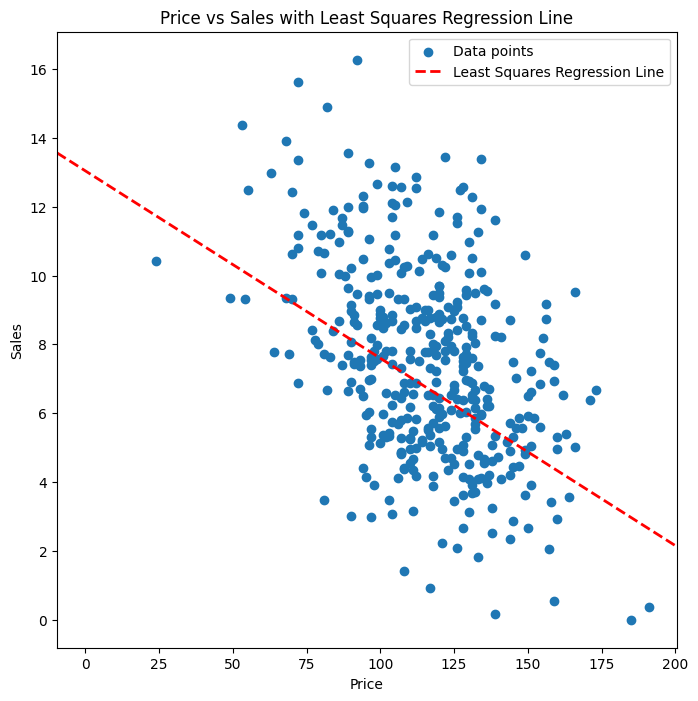

In [360]:
Carseats = load_data("Carseats")

X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model = sm.OLS(Carseats['Sales'], X)
results = model.fit()
results.summary()
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Carseats['Price'], Carseats['Sales'], label='Data points')

ax.axline(xy1=(0, results.params['intercept']), slope=results.params['Price'], color='red', linestyle='--', linewidth=2, label='Least Squares Regression Line')

ax.set_xlabel('Price')
ax.set_ylabel('Sales')
ax.set_title('Price vs Sales with Least Squares Regression Line')
ax.legend()

plt.show()

Based on the above information, the Price and US status has a bigger impact on sales as opposed to Urban status. Actually, Urban status is related to a slight decrease in sales. With a low R2 value, this means there is limited explanatory power and the variance in Sales is not being captured well. This could be improved by the addition of more variables.